# Linear regression, interpolation, numerical computing methods.

In [1]:
# Import libraries needed:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
%matplotlib inline

# Set global font size for plots:
mpl.rcParams['font.size'] = 14
# (see https://matplotlib.org/tutorials/introductory/customizing.html).

**Question 1**. 

a) **(1 point)** Explain in your own words what the key differences are between linear and non-linear least-squares regression.

b) **(0.5 points)** What type of least-squares regression would you apply for fitting a data set of 100 points $(x, y)$ to the finite series function $y(x) = a_0 + \sum_{n=1}^{n=3} a_n \cos(n x)$? Reason why. 

**(Total: 1.5 points)**

## Answer 1 ##
**a)** Least squares regression is a method of minimising the sum of the squares of residuals between a fit and the data. There are two types, linear and non - linear least squares regression. Linear least - squares regression can be fit analytically (meaning we can calculate it using pen and paper) whereas non - linear regression fit can typically only be computed using iterative optimization methods, or in other words, numerically. Note that the non - linear regression technique usually requires a good initial guess for each fit parameter for the fit to be accurate, but linear regression does not. Another difference between the two types of regression is that the function/model is (non) linear in fit parameters for (non) linear regression.

**b)** $y(x) = a_0 + \sum_{n=1}^{n=3} a_n \cos(n x)$ can also be written as:

$y(x) = a_0 + a_1 \cos(x) + a_2 \cos(2x) + a_3 \cos(3x)$

Where the fit parameters are $ a_0, a_1, a_2,$ and $a_3 $. We can see that although there are cosines within the function, the model is linear in the fit parameters as they (the fit parameters) are outside the cosine functions. Therefore, we can use linear least - squares regression here.

**Question 2**

Explain in your own words:

a) **(0.5 points)** What the error surface is in least-squares regression.

b) **(0.5 points)** What the best-fit parameters correspond to in the error surface and why, considering the principles that apply.


**(1 point)**

## Answer 2 ##

**a)** The error surface is a surface of $\chi^2$ as a function of the fit parameters obtained through a least - squares regression. For example, a fit with $m$ parameters will result in a $m$ - dimensional surface. Recall that chi squared is a statistic that compares the size of any discrepancies between the expected results and the actual results.

**b)** The best fit parameters correspond to the global minimum of the error surface. Intuitively, this makes sense as $\chi^2$ is used as a goodness of fit test, and it's value is calculated using the normalised residuals of a model, squared. In a $\chi^2$ test, we aim to minimise the value; as a lower value indicates a better fit. In the same sense, a surface of $\chi^2$ as a function of the fit parameters can tell us the best fit parameters by finding the global minimum of the surface.

**Question 3**. Given the $(x,y)$ data points below (arrays x_data and y_data):

a)  **(1.3 points)** Choose a good model to fit the data and **explain** why you use that model. Explain the fit parameters you use and their meaning. Without doing the fit, guess the numerical values that the fit parameters might take for the data provided and **justify** your answers. Values without explanations will get a low mark. Make sure that you use meaningful fit parameters and as few as possible fit parameters. 

b)  **(0.5 points)** Explain if you need to use linear or non-linear regression for the fit and why. 

c)  **(1.2 points)** Perform the fit and give as final results your fit parameters with their corresponding uncertainties correctly quoted. Calculate also the relative uncertainties of the fit parameters.

**Note for students:** Answer all question parts. Parts b) and c) will be graded independently of whether the answer to a) is correct. 

**(Total: 3 points)**

In [2]:
x1_data = np.arange(0,16,0.25) 
y1_data = np.array([10.70826701, 10.67369213, 11.11576387, 11.4198621 , 11.28460159,
       10.87812773, 10.66330128, 10.71922329,  9.63863394,  9.15027615,
        8.58354276,  7.46836106,  7.10455187,  6.35007181,  5.8932868 ,
        6.19306233,  5.87607772,  7.44452183,  7.08534296,  7.58779247,
        8.44075158,  8.46419579,  9.15413604,  8.51630307,  9.0147704 ,
        8.37862187,  8.84793626,  7.97288832,  6.62348006,  6.54742884,
        5.74553543,  4.48310414,  4.50131387,  4.02110475,  3.83322556,
        3.90877771,  2.8363022 ,  4.85023134,  4.50879078,  5.49100045,
        5.79246915,  6.35265004,  6.69862028,  6.34193328,  6.77930804,
        6.61912086,  5.60618729,  4.58119672,  4.74996798,  3.72944704,
        3.14631242,  1.78303059,  1.36215362,  1.23722896,  1.16004281,
        1.73395164,  1.75315104,  1.89564513,  2.2132878 ,  2.14661467,
        3.30898061,  3.83855118,  3.59349458,  3.95449433]);

## Answer 3 ##

**a)** First, we should plot the data to get a better look at the shape, and from that we should be able to approximate the function, based on the functions we have dealt with already in data analysis. **(more of part a) below)**

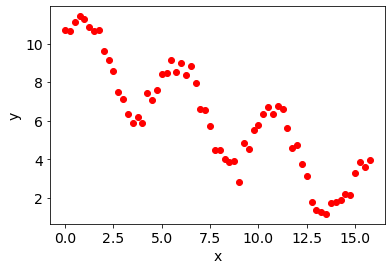

In [3]:
# Plot data:
plt.plot(x1_data, y1_data, 'ro') #plot using red dots
plt.xlabel("x")
plt.ylabel("y");

**a) (continued)** This graph of the data gives us an idea that the function has either a cosine or a sine within it, due to the oscillating nature of the points. We can also see that the function has an overall negative linear gradient, so we also need to include a $-mx$ term in our function. As the function doesn't immediately fit sine or cosine, we will also need to include a phase shift in our oscillating function. The amplitude of the oscillating function is clearly not 1 so cannot be ignored either. Therefore, I chose a model of the following form: $$y(x) = A -Bx + C\cos(\frac{2\pi}{D} x + E)\,$$ 

With A as initial vertical offset, B as the overall gradient of the function, C as the amplitude of the function, D is the wavelength of the oscillation, and E is the phase shift.

**Initial guesses:**

$[A = 10]$ as the equilibrium point of oscillation roughly starts here

$[B = 0.5]$ estimate overall gradient using the first and last peaks : $\frac{7}{15}$ I used points (1,12) and (16,5)

$[C = 2]$ peak to peak height is about 4 so amplitude is around 2

$[D = 5]$ wavelength is about 5 units

$[E = -1]$ cosine has a peak at x = 0 so we need shift the graph right by 1 unit as peak in our function occurs at $x \approx 1$

**b)** We will need to use non - linear regression for this fit as fit parameters $D$ and $E$ are inside the cosine function and therefore the model should be non - linear.

In [4]:
#creating my function
def q3_fun(x, A, B, C, D, E):
    '''cosine oscillation with vertical offset A, overall gradient B, 
    amplitude C, wavelength D and phase shift E.'''
    return A - B*x + C*np.cos(x*2*np.pi/D + E)

In [5]:
init_guesses = [10,0.5,2,5,-1]  #inital guesses for each fit parameter
fitp, covm = curve_fit(q3_fun, x1_data, y1_data, init_guesses)
#Fit parameters are (fitp) and covariance matrix is (covm).

#finding errors
errors = np.sqrt(np.diag(covm))

parameter_names = ["A", "B", "C", "D", "E"]
[print(parameter_names[i]," = {0:0.2f} \xb1 {1:0.2f}".format(fitp[i],errors[i])) for i in range(len(fitp))];

A  = 10.01 ± 0.09
B  = 0.51 ± 0.01
C  = 1.99 ± 0.06
D  = 4.94 ± 0.03
E  = -1.34 ± 0.06


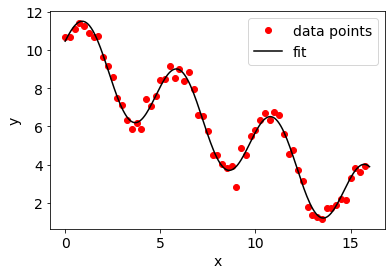

looks good!


In [6]:
#Double checking the fit has not gone horribly wrong
xline = np.array(np.linspace(0,16,200)) 
yline = q3_fun(xline,*fitp)                
plt.plot(x1_data, y1_data, 'ro', label="data points")    
plt.plot(xline, yline, 'k', label="fit")        
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("looks good!")

**c)** The final fit parameters and their absolute uncertainties: 

$$ A  = 10.01 ± 0.09 $$

$$ B  = 0.51 ± 0.01 $$

$$ C  = 1.99 ± 0.06 $$

$$ D  = 4.94 ± 0.03 $$

$$ E  = -1.34 ± 0.06 $$

and their relative uncertainties:

$$ \frac{\Delta A}{A}\ \approx 0.01$$

$$ \frac{\Delta B}{B}\ \approx 0.02$$

$$ \frac{\Delta C}{C}\ \approx 0.03$$

$$ \frac{\Delta D}{D}\ \approx 0.01$$

$$ \frac{\Delta E}{E}\ \approx 0.04$$

**Question 4**

Given the following data for variables $x$ and $y$ (see x_data and y_data arrays below), is there any kind of correlation between the two variables? Be quantitative in your answer. a) Calculate the relevant coefficient **(1 point)**, b) plot the data **(0.5 points)** and c) justify your answer **(0.5 points)**.

Python hints: 

- You can calculate the mean of an array of values, x_list, as np.mean(x_list).
- You can calculate the standard deviation of an array of values, x_list, as np.std(x_list).
- You can calculate the summation of all the elements in an array (x_list) as np.sum(x_list).
- Remember that you can get the number of elements in an array as len(x_list).

**(2 points)**

In [7]:
x_data = np.array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

y_data = np.array([ 0.15466676, -0.12799557, -0.19063118, -0.27314422, -0.14152125,
       -0.21568703, -0.11131325, -0.10817707, -0.2317996 , -0.06066661,
        0.22427488,  0.02230707, -0.09576264, -0.12042845, -0.05907652,
        0.14237985,  0.19861709, -0.35070464,  0.19030688,  0.4889902 ,
        0.06827335,  0.11353171,  0.30040993,  0.04100481, -0.05314513,
       -0.23771713,  0.63618804,  0.47091208,  0.54560845,  0.55398236,
       -0.15044774,  0.28542058,  0.73937224,  0.17517441,  0.71903778,
        0.36455226,  0.10543569,  0.64575684,  0.18095802,  0.66494061,
        0.38867082,  0.82142968,  0.55225036,  0.30250919,  0.46193306,
        0.47589633,  0.69730196,  0.57418174,  0.74091886,  1.09902343])

## Answer 4 ##
**a)** To test the correlation of 2 data sets, we can use the correlation coefficient, which can be calculated using the following formula:

$$ \rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} $$

Which can also be written:

 $$ \rho = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{n\sigma_x \sigma_y} $$

where $ \text {cov}(X,Y) $ is the covariance of X and Y, $ \overline{x} $ is the mean of x values, $ \overline{y} $ is the mean of y values, n is the number of data points, and $ \sigma_x , \sigma_y $ correspond to the standard deviation of x and y respectively.

This is calculated below:

In [8]:
#calculating covariance of x and y
covxy = (np.sum((x_data - np.mean(x_data)) * (y_data - np.mean(y_data))) ) * 1/len(x_data)
#normalising covariance of x and y by dividing by product of both their standard deviations
rho = covxy/(np.std(x_data)*np.std(y_data))
print("The correlation coefficient is", rho)

The correlation coefficient is 0.7653699778574488


b) Now plotting the data:


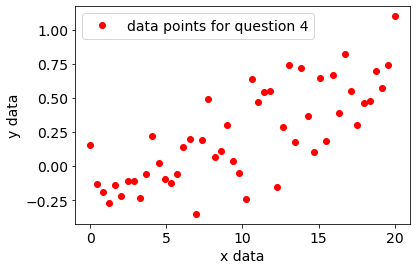

In [9]:
# Plot data:
print("b) Now plotting the data:")
plt.plot(x_data, y_data, 'ro',label = "data points for question 4") #plot using red dots
plt.xlabel("x data")
plt.ylabel("y data")
plt.legend(loc = "best");

**c)** The resulting value of the correlation coefficient is $ \approx $ 0.77, which is relatively close to positive 1. This indicates that this data is firstly quite strongly correlated. Secondly, as it is a positive value, it indicates that the data is positively correlated. Looking at the data itself, plotted above, we can see that data roughly fits into an elliptical shape, going from the bottom left of the graph to top right, also confirming that the data has quite strong positive correlation.

**Question 5** 

a) Apply linear interpolation using function interp1d (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) and calculate the interpolated function for the following data set of $(x, y)$ points (see x_data, y_data). Plot the data points and the interpolated function. **(1 point)**

b) Use the interpolated function to find out the interpolated $y$ value at $x = 3.2$.   **(0.5 points)**

c) Compare the result obtained for $y$ at $x = 3.2$ using interp1d to the result obtained by calculating linear interpolation between two suitable data points using the relevant formula (see *Booklet*, interpolation section). **(1 point)**

**(Total: 2.5 points)**

In [10]:
x2_data = np.arange(0,6,0.5)

y2_data = np.array([ 1.        ,  0.99500417,  0.92106099,  0.62160997, -0.02919952,
       -0.80114362, -0.89675842,  0.18651237,  0.99318492, -0.24354415,
       -0.83907153,  0.89320611])

## Answer 5 ## 
**a)** For part a) I have used linear interpolation on the x and y data.

In [11]:
interp_fun = interp1d(x2_data, y2_data, kind='linear',fill_value='extrapolate')
#interp_fun = interp1d(x2_data, y2_data, kind='cubic')

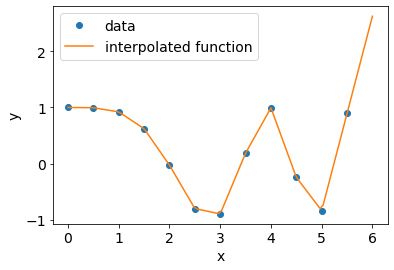

In [14]:
new_xpoints = np.linspace(0, 6, 100)

plt.plot(x2_data, y2_data, 'o', label="data")
plt.plot(new_xpoints, interp_fun(new_xpoints), '-', label="interpolated function")
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
print("b)")
print("The y value at x=3.2 is", interp_fun(3.2))

b)
The y value at x=3.2 is -0.46345010399999953


**c)** The equation we use to find a value of a function $ f(x) $ at a query point, $x = c$, using linear interpolation between 2 points $x=a$ and $x=b$  is:

$$ f(c) = f(b) + \frac{f(b)-f(a)}{b-a}(c-b) $$

This equation is derived from the fact that linear interpolation finds the value of a query point by assuming that the function is linear between a and b. This means that the gradient of the line that joins a and b is the same as the gradient of the line that joins query point c, and b. This gives us the following equation which can be rearranged to the equation above: 

$$ \frac {f (b) − f (a)}
{b − a}
=
\frac {f (b) − f (c)}
{b − c} $$

So we calculate the value below using this equation:

In [16]:
#substitute accordingly into the equation above, using 
#points 7 and 8 of data [(3.0,-0.89675842), (3.5,0.18651237)]

new_value = 0.18651237 + ((0.18651237 + 0.89675842)/(0.5))*(3.2 - 3.5)
print("Value of function at x=3.2 using linear interpolation is", new_value)

Value of function at x=3.2 using linear interpolation is -0.46345010399999964
